# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Abdul Hakim Zelfi]
- **Email:** [abdul.conan48@gmail.com]
- **ID Dicoding:** [kimmzlf]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dari waktu ke waktu?
- Bagaimana hubungan cuaca dengan jumlah sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Memuat tabel day_csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Memuat tabel hour_csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat dua tabel utama pada dataset Bike Sharing: day.csv berisi jumlah sepeda yang disewakan per-hari, hour.csv berisi jumlah sepeda yang disewakan per-jam.
- Jumlah sepeda yang disewakan akan dianalisa melalui beberapa faktor: Waktu(year, month, hour, weekday, holiday, workingday), Cuaca dan Musim (weathersit, temp, atemp, hum, windspeed), dan Jenis User (casual, registered).

### Assessing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum()

np.int64(0)

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
numerical_cols = ['casual', 'registered', 'cnt']

Q1_day = day_df[numerical_cols].quantile(0.25)
Q3_day = day_df[numerical_cols].quantile(0.75)
IQR_day = Q3_day - Q1_day

min_day = Q1_day - 1.5 * IQR_day
max_day = Q3_day + 1.5 * IQR_day

# Tabel batas outlier
outlier_bounds_day = pd.DataFrame({
    'Q1': Q1_day,
    'Q3': Q3_day,
    'IQR': IQR_day,
    'Minimum': min_day,
    'Maximum': max_day
})

outlier_bounds_day

,Q1,Q3,IQR,Minimum,Maximum
casual,315.5,1096.0,780.5,-855.25,2266.75
registered,2497.0,4776.5,2279.5,-922.25,8195.75
cnt,3152.0,5956.0,2804.0,-1054.00,10162.00


In [10]:
outliers_day = day_df[
    ((day_df[numerical_cols] < min_day) |
     (day_df[numerical_cols] > max_day)).any(axis=1)
]

outliers_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,2011-05-29,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788
183,184,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,2367,4649
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
246,247,2011-09-04,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940


#### Menilai data hour_df

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
hour_df.duplicated().sum()

np.int64(0)

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
numerical_cols = ['casual', 'registered', 'cnt']

Q1_hour = hour_df[numerical_cols].quantile(0.25)
Q3_hour = hour_df[numerical_cols].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour

min_hour = Q1_hour - 1.5 * IQR_hour
max_hour = Q3_hour + 1.5 * IQR_hour

# Tabel batas outlier
outlier_bounds_hour = pd.DataFrame({
    'Q1': Q1_hour,
    'Q3': Q3_hour,
    'IQR': IQR_hour,
    'Minimum': min_hour,
    'Maximum': max_hour
})

outlier_bounds_hour           

,Q1,Q3,IQR,Minimum,Maximum
casual,4.0,48.0,44.0,-62.0,114.0
registered,34.0,220.0,186.0,-245.0,499.0
cnt,40.0,281.0,241.0,-321.5,642.5


In [16]:
outliers_hour = hour_df[
    ((hour_df[numerical_cols] < min_hour) |
     (hour_df[numerical_cols] > max_hour)).any(axis=1)
]

outliers_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1633,1634,2011-03-13,1,0,3,14,0,0,0,1,0.46,0.4545,0.41,0.2985,144,106,250
1634,1635,2011-03-13,1,0,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,149,155,304
1635,1636,2011-03-13,1,0,3,16,0,0,0,1,0.46,0.4545,0.41,0.3881,124,132,256
1771,1772,2011-03-19,1,0,3,12,0,6,0,1,0.46,0.4545,0.33,0.4179,126,141,267
1772,1773,2011-03-19,1,0,3,13,0,6,0,1,0.50,0.4848,0.34,0.4627,174,127,301


**Insight:**
- Pada day_df & hour_df data sudah memiliki tipe data yang sesuai, tidak terdapat missing value dan duplicated value.
- Pada day_df & hour_df terdapat kesalahan tipe data pada kolom `dteday` (obj) yang seharusnya direpresentasikan sebagai tipe data `datetime`.
- Metode IQR diterapkan pada tiga kolom yaitu `casual`, `registered`, dan `cnt`. Ketiga kolom tersebut dipilih karena merepresentasikan banyaknya sepeda yang disewakan.
  - Outliers ditemukan pada day_df & hour_df masing-masing pada kolom `casual`.

### Cleaning Data

#### Membersihkan data day_df

In [17]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan data hour_df

In [18]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
(day_df['cnt'] == day_df['casual'] + day_df['registered']).all()

np.True_

In [20]:
(hour_df['cnt'] == hour_df['casual'] + hour_df['registered']).all()

np.True_

**Insight:**
- Kolom `dteday` di kedua dataset berhasil dikonversi dari tipe `object` ke tipe `datetime`.
- Outliers dibiarkan terlebih dahulu.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [21]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [22]:
day_df[["casual", "registered", "cnt"]].agg(
    ["count", "min", "mean", "max", "std", "sum"]
).T

,count,min,mean,max,std,sum
casual,731.0,2.0,848.176471,3410.0,686.622488,620017.0
registered,731.0,20.0,3656.172367,6946.0,1560.256377,2672662.0
cnt,731.0,22.0,4504.348837,8714.0,1937.211452,3292679.0


In [23]:
weather_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_weather = day_df[weather_cols].corr()
corr_weather

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [24]:
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain / Snow',
    4: 'Heavy Rain / Snow'
}
weather_summary = (
    day_df
    .assign(weather_label=day_df['weathersit'].map(weather_map))
    .groupby('weather_label')
    .agg(
        total_days=('cnt', 'count'),
        total_rentals=('cnt', 'sum')
    )
)

weather_summary

,total_days,total_rentals
weather_label,,
Clear,463,2257952
Light Rain / Snow,21,37869
Mist,247,996858


In [25]:
season_map = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

season_summary = (
    day_df
    .assign(season_label=day_df['season'].map(season_map))
    .groupby('season_label')
    .agg(
        total_days=('cnt','count'),
        total_rentals=('cnt', 'sum')
    )
)
season_summary

,total_days,total_rentals
season_label,,
Fall,188,1061129
Springer,181,471348
Summer,184,918589
Winter,178,841613


In [26]:
working_cnt = (
    day_df
    .groupby('workingday')
    .agg(
        total_days = ('cnt', 'count'),
        total_rentals = ('cnt', 'sum')
    )
)
working_cnt

,total_days,total_rentals
workingday,,
0,231,1000269
1,500,2292410


In [27]:
weekday_cnt = (
    day_df
    .groupby('weekday')
    .agg(
        total_days = ('cnt', 'count'),
        total_rentals = ('cnt', 'sum')
    )
)
weekday_cnt

,total_days,total_rentals
weekday,,
0,105,444027
1,105,455503
2,104,469109
3,104,473048
4,104,485395
5,104,487790
6,105,477807


In [28]:
holiday_cnt = (
    day_df
    .groupby('holiday')
    .agg(
        total_days = ('cnt', 'count'),
        total_rentals = ('cnt', 'sum')
    )
)
holiday_cnt

,total_days,total_rentals
holiday,,
0,710,3214244
1,21,78435


### Explore hour_df

In [29]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
hour_df[["casual", "registered", "cnt"]].agg(
    ["count", "min", "mean", "max", "std", "sum"]
).T

,count,min,mean,max,std,sum
casual,17379.0,0.0,35.676218,367.0,49.305030,620017.0
registered,17379.0,0.0,153.786869,886.0,151.357286,2672662.0
cnt,17379.0,1.0,189.463088,977.0,181.387599,3292679.0


In [31]:
weather_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_weather = hour_df[weather_cols].corr()
corr_weather

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


In [32]:
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain / Snow',
    4: 'Heavy Rain / Snow'
}

weather_summary = (
    hour_df
    .assign(weather_label=hour_df['weathersit'].map(weather_map))
    .groupby('weather_label')
    .agg(
        total_hours=('cnt', 'count'),
        total_rentals=('cnt', 'sum')
    )
)

weather_summary

,total_hours,total_rentals
weather_label,,
Clear,11413,2338173
Heavy Rain / Snow,3,223
Light Rain / Snow,1419,158331
Mist,4544,795952


In [33]:
season_map = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

season_summary = (
    hour_df
    .assign(season_label=hour_df['season'].map(season_map))
    .groupby('season_label')
    .agg(
        total_hours=('cnt','count'),
        total_rentals=('cnt', 'sum')
    )
)
season_summary

,total_hours,total_rentals
season_label,,
Fall,4496,1061129
Springer,4242,471348
Summer,4409,918589
Winter,4232,841613


In [34]:
working_cnt = (
    hour_df
    .groupby('workingday')
    .agg(
        total_hours = ('cnt', 'count'),
        total_rentals = ('cnt', 'sum')
    )
)
working_cnt

,total_hours,total_rentals
workingday,,
0,5514,1000269
1,11865,2292410


In [35]:
weekday_cnt = (
    hour_df
    .groupby('weekday')
    .agg(
        total_hours = ('cnt', 'count'),
        total_rentals = ('cnt', 'sum')
    )
)
weekday_cnt

,total_hours,total_rentals
weekday,,
0,2502,444027
1,2479,455503
2,2453,469109
3,2475,473048
4,2471,485395
5,2487,487790
6,2512,477807


**Insight:**
- `Registered` user lebih banyak menyewakan sepeda daripada `casual` user
- Jumlah sepeda yang disewakan (`cnt`) memiliki korelasi positif terhadap `temp` dan `atemp` yang berarti semakin tinggi `temp` atau `atemp` semakin banyak jumlah sepeda yang disewakan (`cnt`)
- Jumlah sepeda yang disewakan (`cnt`) memiliki korelasi negatif terhadap `hum` dan `windspeed` yang berarti semakin tinggi `hum` atau `windspeed` semakin sedikit jumlah sepeda yang disewakan (`cnt`)
- Berdasarkan cuaca, jumlah sepeda yang disewakan paling banyak ketika `weathersit` = 1 (Clear)
- Berdasarkan musim, jumlah sepeda yang disewakan paling banyak ketika `season` = 1 (Fall)
- Berdasarkan hari, jumlah sepeda yang disewakan paling banyak ketika `workingday` = 1 (workingday)
- Untuk persebaran hari, jumlah sepeda yang disewakan cukup merata

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda dari waktu ke waktu?

In [36]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

monthly_trends = (
    day_df
    .resample('ME', on='dteday')
    .agg(cnt=('cnt', 'sum'))
)

monthly_trends['year'] = monthly_trends.index.year
monthly_trends['month'] = monthly_trends.index.strftime('%B')

monthly_comparison = (
    monthly_trends
    .pivot(index='month', columns='year', values='cnt')
)

month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

monthly_comparison = monthly_comparison.reindex(month_order)

monthly_comparison

year,2011,2012
month,,
January,38189,96744
February,48215,103137
March,64045,164875
April,94870,174224
May,135821,195865
June,143512,202830
July,141341,203607
August,136691,214503
September,127418,218573


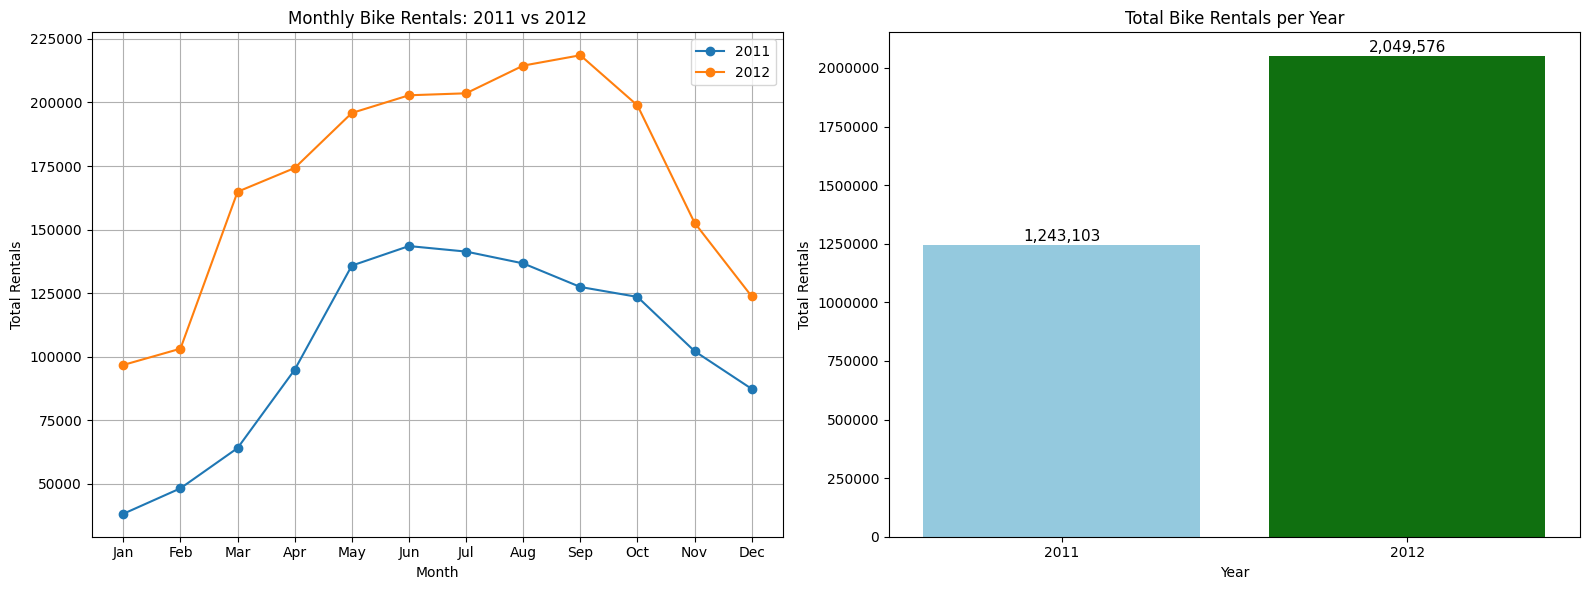

In [37]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year

df_filtered = day_df[day_df['year'].isin([2011, 2012])].copy()
df_filtered['month'] = df_filtered['dteday'].dt.month

monthly_trends = df_filtered.groupby(['year','month']).agg(total_rentals=('cnt','sum')).reset_index()
monthly_trends_pivot = monthly_trends.pivot(index='month', columns='year', values='total_rentals')

month_names = [pd.to_datetime(str(m), format='%m').strftime('%b') for m in monthly_trends_pivot.index]

total_per_year = day_df.groupby('year')['cnt'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].plot(monthly_trends_pivot.index, monthly_trends_pivot[2011], marker='o', label='2011')
axes[0].plot(monthly_trends_pivot.index, monthly_trends_pivot[2012], marker='o', label='2012')
axes[0].set_xticks(monthly_trends_pivot.index)
axes[0].set_xticklabels(month_names)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Rentals')
axes[0].set_title('Monthly Bike Rentals: 2011 vs 2012')
axes[0].grid(True)
axes[0].legend()

sns.barplot(x='year', y='cnt', hue='year', data=total_per_year, palette=['skyblue','green'], dodge=False, legend=False)
axes[1].set_title('Total Bike Rentals per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Rentals')
axes[1].ticklabel_format(style='plain', axis='y')

for p in axes[1].patches:
    axes[1].annotate(f"{int(p.get_height()):,}", 
                     (p.get_x() + p.get_width()/2, p.get_height() + 20000),
                     ha='center', fontsize=11)

plt.tight_layout()
plt.show()

**Insight:**
- Penyewaan meningkat dari 1,24 juta → 2,05 juta, naik sekitar 65% dalam setahun.
- Terjadi penurunan yang signifikan ketika menuju akhir tahun(Q4) pada masing-masing tahun.
- Terjadi peningkatan yang signifikan dari feb-mei pada masing-masing tahun

### Pertanyaan 2: Bagaimana hubungan cuaca dengan jumlah sewa sepeda

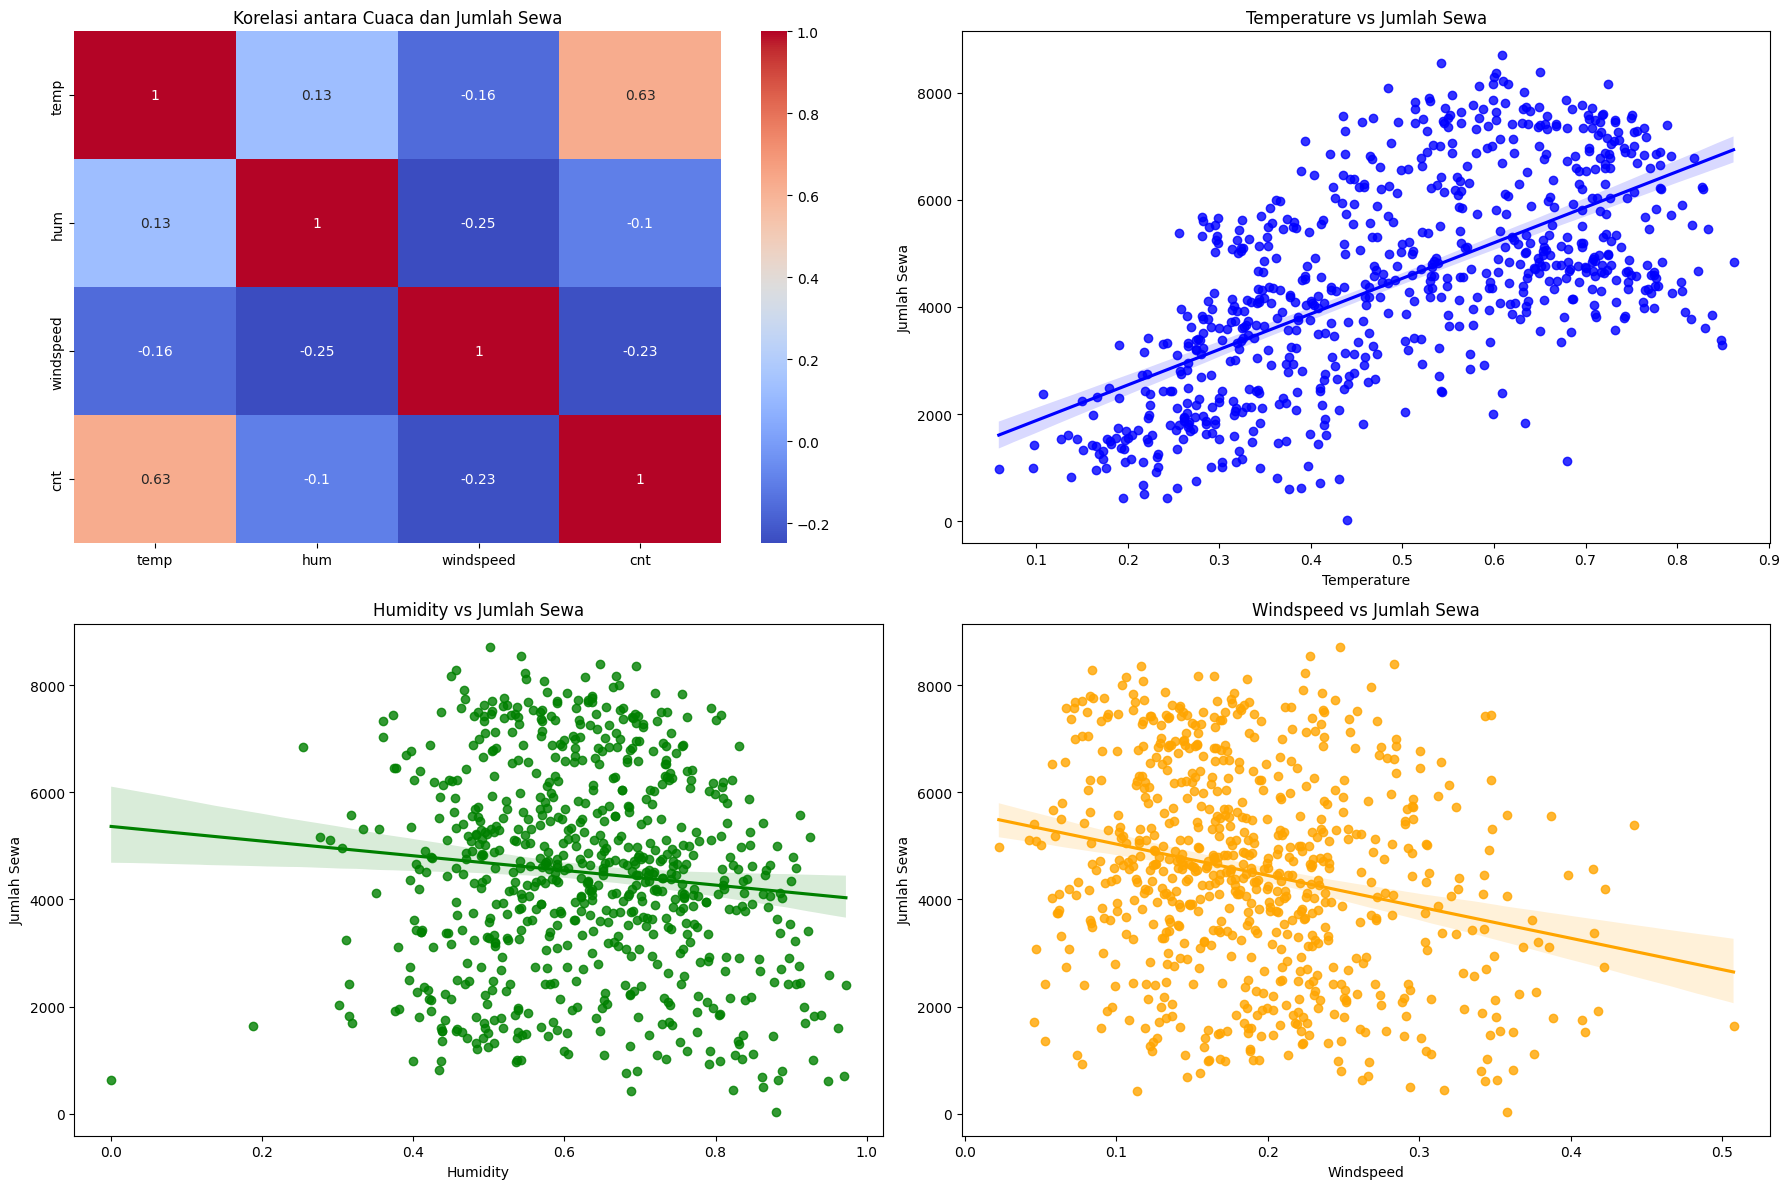

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

corr_matrix = day_df[["temp", "hum", "windspeed", "cnt"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axes[0,0])
axes[0,0].set_title("Korelasi antara Cuaca dan Jumlah Sewa")

sns.regplot(x="temp", y="cnt", data=day_df, ax=axes[0,1], color="blue")
axes[0,1].set_title("Temperature vs Jumlah Sewa")
axes[0,1].set_xlabel("Temperature")
axes[0,1].set_ylabel("Jumlah Sewa")

sns.regplot(x="hum", y="cnt", data=day_df, ax=axes[1,0], color="green")
axes[1,0].set_title("Humidity vs Jumlah Sewa")
axes[1,0].set_xlabel("Humidity")
axes[1,0].set_ylabel("Jumlah Sewa")

sns.regplot(x="windspeed", y="cnt", data=day_df, ax=axes[1,1], color="orange")
axes[1,1].set_title("Windspeed vs Jumlah Sewa")
axes[1,1].set_xlabel("Windspeed")
axes[1,1].set_ylabel("Jumlah Sewa")

plt.tight_layout()
plt.show()

**Insight:**
- `temperature` memiliki korelasi positif yang cukup besar (0,63) dengan jumlah sewa sepeda, artinya semakin tinggi suhu, semakin banyak sepeda yang disewa.
- `humidity` memiliki korelasi negatif yang kecil (-0,10),artinya semakin lembap semakin mengurangi jumlah penyewaan, meskipun pengaruhnya tidak terlalu kuat.
- `windspeed` memiliki korelasi negatif yang kecil (-0,23), artinya semakin kencang angin semakin mengurangi jumlah penyewaan, meskipun pengaruhnya tidak terlalu kuat.
- Scatter plot menunjukkan tren positif yang  antara suhu dan sewa sepeda, yang dikonfirmasi oleh garis regresi yang menunjukkan peningkatan penyewaan seiring dengan kenaikan suhu. Meskipun variabilitas data beragam, tetap menunjukkan tren positif
- Scatter plot menunjukkan variabilitas data yang beragam pada `humidity` dan `windspeed` terhadap jumlah sewa yang semakin mendukung kalau korelasi kedua paramater tersebut memiliki korelasi negatif yang kecil

## Analisis Lanjutan

### Clustering

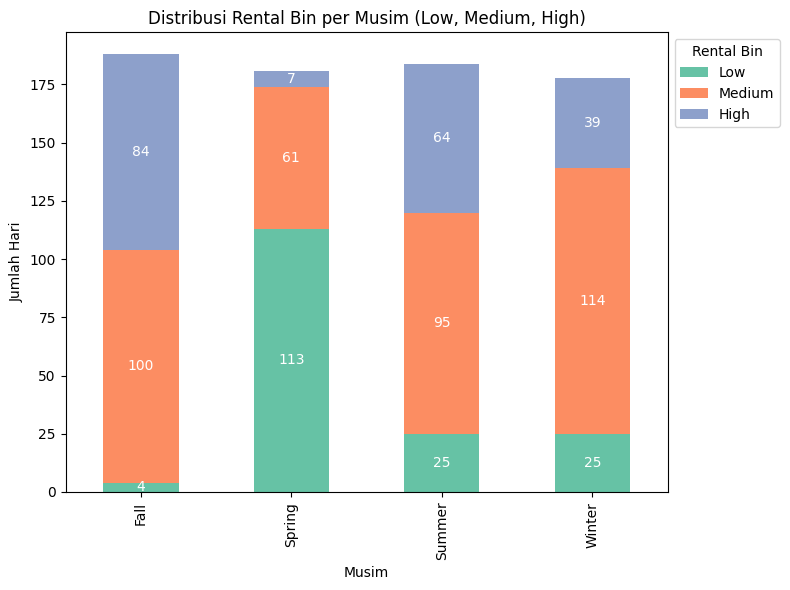

In [39]:
min_cnt = day_df['cnt'].min()
max_cnt = day_df['cnt'].max()
bins = [min_cnt, min_cnt + (max_cnt-min_cnt)/3, min_cnt + 2*(max_cnt-min_cnt)/3, max_cnt+1]
labels = ['Low', 'Medium', 'High']
day_df['rental_bin'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, include_lowest=True)

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_mapping)

season_bin = day_df.groupby(['season_name', 'rental_bin'], observed=True).size().unstack(fill_value=0)

ax = season_bin.plot(kind='bar', stacked=True, figsize=(8,6),
                     color=['#66c2a5','#fc8d62','#8da0cb'])

plt.title('Distribusi Rental Bin per Musim (Low, Medium, High)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')

ax.legend(title='Rental Bin', loc='upper left', bbox_to_anchor=(1,1))

for i, season in enumerate(season_bin.index):
    bottom = 0
    for j, col in enumerate(season_bin.columns):
        value = season_bin.loc[season, col]
        if value > 0:
            ax.text(i, bottom + value/2, str(value), ha='center', va='center', color='white', fontsize=10)
            bottom += value

plt.tight_layout()
plt.show()

Dalam analisis ini, data jumlah penyewaan sepeda per hari dikategorikan menggunakan teknik binning (Low, Medium, High) untuk menyederhanakan variabel numerik menjadi kategori yang mudah dianalisis. Selanjutnya, distribusi kategori penyewaan dianalisis per musim (Spring, Summer, Fall, Winter) menggunakan stacked bar chart untuk mengidentifikasi pola musiman dan melihat proporsi hari sepi, normal, dan ramai. Tujuan dari teknik ini adalah untuk menemukan pola penggunaan sepeda secara musiman dan mendukung keputusan operasional seperti alokasi sepeda dan strategi promosi.

## Conclusion

- Tren penggunaan sepeda menunjukkan pertumbuhan tahunan yang kuat dari tahun lalu dengan pola musiman yang jelas, yaitu meningkat di awal hingga pertengahan tahun dan menurun menjelang akhir tahun.
- Jumlah sewa sepeda paling dipengaruhi oleh suhu, sementara kelembapan dan angin hanya berpengaruh sedikit. Secara praktis, penyewaan sepeda meningkat pada hari cerah dan hangat, dan sedikit berkurang pada hari lembap atau berangin.